# fastspeech

> A pytorch implementation of the FastSpeech architecture

## Install

```sh
pip install -e '.[dev]'
```

## How to use

In [ ]:
#| hide
from fastspeech.inference import *
import torch
from fastspeech.visualize import show_mel
from IPython.display import Audio
from librosa.feature.inverse import mel_to_audio

In [ ]:
#| hide
checkpoint_path = "../checkpoints/save_590.pt"
vocab_path = "../sample_data/cmudict-0.7b.symbols.txt"
sr = 22050

The first step to use the model for inference is to import the model from a trained checkpoint

In [ ]:
model, norm = load_model_inference(checkpoint_path)

Next we need to process the text to convert it into something the model can recognize

In [ ]:
text = "Hi, my name is a hod and this is a demonstration of my implementation of the fast speech model"
phones = preprocess_text(text, vocab_path)

Then we generate the melspectrogram using the FastSpeech model

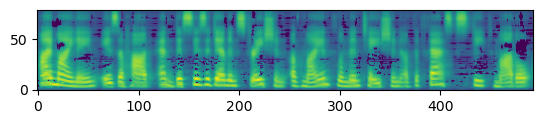

In [ ]:
mel = bayesian_inference(phones, model, 10)
mel = norm.denormalize(mel)
show_mel(mel)

In [ ]:
#| hide
wav = mel_to_audio(mel.numpy(), sr=sr, n_fft=1024, hop_length=256, n_iter=16)

Lastly we use a vocoder to convert the melspectrogram to a wav file. In this case we are using the Griffin-Lim Algorithm to perform the inverse operation

In [ ]:
Audio(wav, rate=sr)